In [1]:

from tika import parser
import re
data = []

NUM_OF_FILE = 75
for i in range(NUM_OF_FILE):
    pdf_loc = '../datasets/nsf_grfp/personal' + str(i+1) + '.pdf'
    raw = parser.from_file(pdf_loc)
    item = raw['content']
    item = item.replace('\n', '')
    re.sub(r'[^a-zA-Z ]+', '', item)
    data.append(item)



In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

additional_stop_words = ['students', 'student', 'program', 'nsf', 'time', 'work', 'year', 'chemistry', 'physics',
                        'college', 'school', 'future', 'personal', 'science', 'university', 'engineering', 'research', 'graduate',
                        'scientific', 'graduate', 'undergraduate', 'experience', 'professor', 'field','education', 'statement',
                        ]
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

vec = CountVectorizer(stop_words=stop_words)
X = vec.fit_transform(data)

table = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
table = table.apply(sum)
table = pd.Series(table)
table = table.sort_values(ascending=False)



In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

num_of_words=200 #number of words shown
words = ''
for i in range(num_of_words):
    words = words + ' ' + table.index[i] #table is a Series holding words with sorted frequencies 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1200x1000 with 1 Axes>

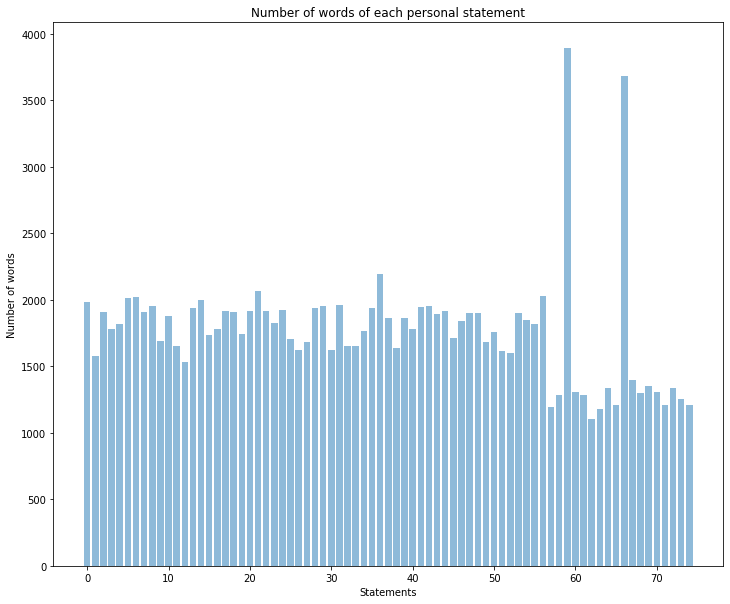

In [4]:
import numpy as np
draw = [len(item.split()) for item in data]

x_pos = np.arange(75)
plt.figure(figsize=(12,10))
plt.bar(x_pos, draw, align='center', alpha=0.5)
plt.ylabel('Number of words')
plt.xlabel('Statements')
plt.title('Number of words of each personal statement')
plt.savefig('graph1.png')

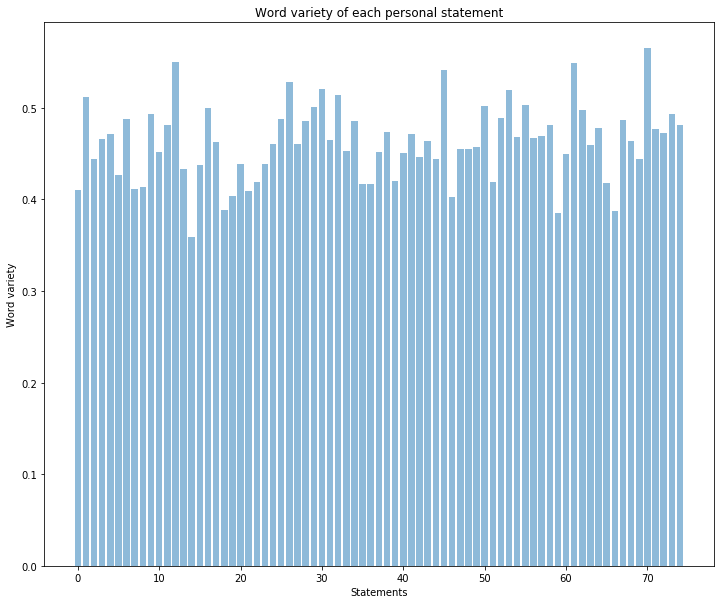

In [5]:
from collections import Counter
    
draw = [len(Counter(item.split()).keys()) / len(item.split()) for item in data]

x_pos = np.arange(75)
plt.figure(figsize=(12,10))
plt.bar(x_pos, draw, align='center', alpha=0.5)
plt.ylabel('Word variety')
plt.xlabel('Statements')
plt.title('Word variety of each personal statement')
plt.savefig('graph2.png')

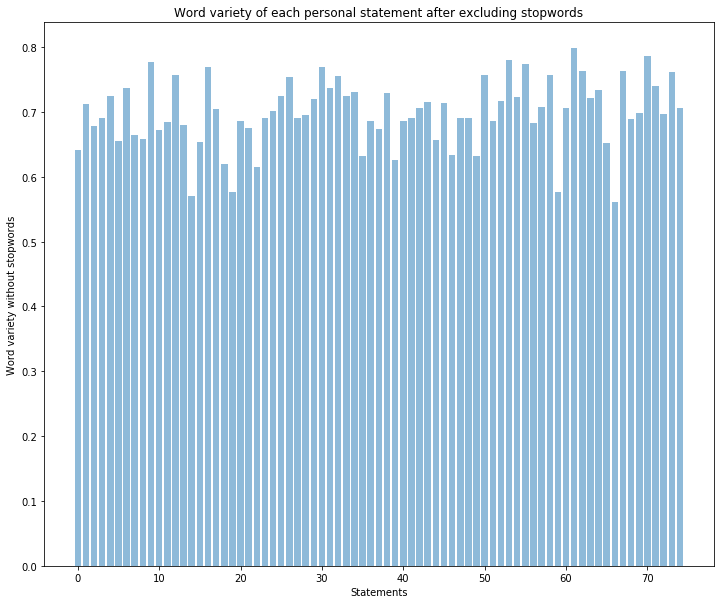

In [6]:
draw = []
for i in range(NUM_OF_FILE):
    count = Counter(word for word in data[i].split() if word not in stop_words)
    total = [word for word in data[i].split() if word not in stop_words]
    temp = len(count.keys()) / len(total)
    draw.append(temp)
    
x_pos = np.arange(75)
plt.figure(figsize=(12,10))
plt.bar(x_pos, draw, align='center', alpha=0.5)
plt.ylabel('Word variety without stopwords')
plt.xlabel('Statements')
plt.title('Word variety of each personal statement after excluding stopwords')
plt.savefig('graph3.png')